In [1]:
import sys
import argparse
import random
import torch
import pandas as pd
import numpy as np

import pytorch_lightning as pl
from lit_transformer_model import Seq2SeqTransformer
from lit_transformer_model import ReverseStringsDataset

import matplotlib.pyplot as plt

torch.backends.cudnn.deterministic = True
torch.set_printoptions(profile="full")

In [2]:
model = Seq2SeqTransformer(nhead = 1,
                           num_decoder_layers = 1,
                           num_encoder_layers = 1)
ckpt = torch.load("/home/sk/pytorch_logs/Seq2SeqTransformer/version_97/checkpoints/epoch=27-step=8763.ckpt")
model.load_state_dict(ckpt["state_dict"])

vocabulary 14 {'i': 12, 'j': 11, 'e': 4, 'b': 6, '<unk>': 0, '<start>': 2, '<pad>': 1, 'a': 13, 'g': 7, 'f': 10, 'h': 5, 'd': 8, '<eos>': 3, 'c': 9}
TransformerEncoderLayer dropout 0.1 16 1e-05 {'device': None, 'dtype': None}
Seq2SeqTransformer
learning_rate 0.0001
batch_size 32
dim_feedforward 2048
nhead 1
num_decoder_layers 1
num_encoder_layers 1


<All keys matched successfully>

input c h f d b h h e h i h g i c j g g f b e b h b c a b h a i b c f j h d i e f h f f g e c d e a d f h a i e g g d d a h f b b h g b h j h a a e i c j e c j e g h c g j g i g a e a j i c h f d d e d j e e c e c h b e c b j h c a h d j h e a g a e c c g i i h f d j d j i i g f f h h h e i f b i a a d b i b f i d i c c f c j g e e d c c e f b g f i a d c b h c d c c i f i a h g j g a c h j d j d e g b h j c j i b e f j d a f c h f i j b d b f i c e f h i f d b e g d e c b c c j h h d g j c d c b h f b i h g i i
output i i g h i b f h b c d c j g d h h j c c b c e d g e b d f i h f e c i f b d b j i f h c f a d j f e b i j c j h b g e d j d j h c a g j g h a i f i c c d c h b c d a i f g b f e c c d e e g j c f c c i d i f b i b d a a i b f i e h h h f f g i i j d j d f h i i g c c e a g a e h j d h a c h j b c e b h c e c e e j d e d d f h c i j a e a g i g j g c h g e j c e j c i e a a h j h b g h b b f h a d d g g e i a h f d a e d c e g f f h f e i d h j f c b i a h b a c b h b e b

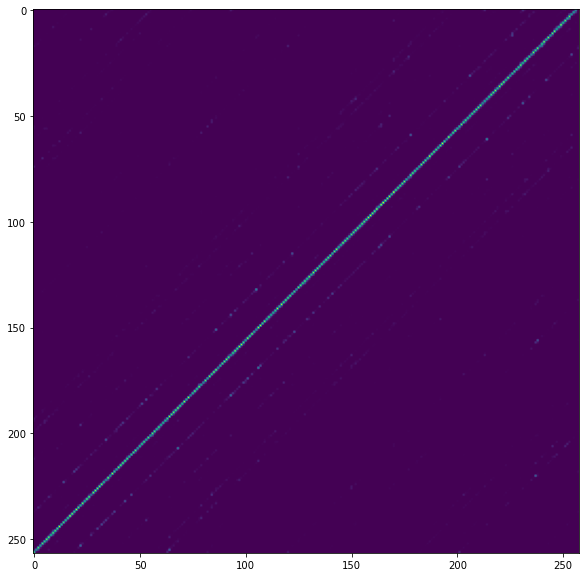

In [3]:
test_data = pd.read_csv('./data/rev_val_256.csv', header=None, sep=';')
dataset = ReverseStringsDataset(test_data)
input = dataset[0][0]
output = dataset[0][1]
print("input", input)
print("output", output)
prediction, w = model.translate(input)
print("prediction", prediction)
print(output == prediction, len(output), len(prediction))

img = w.squeeze()
print(img.shape)
# plt.pcolormesh(img, cmap='RdBu')
# plt.ylabel('Depth')
# plt.xlabel('Position')
# plt.colorbar()
# plt.show()

fig = plt.figure(figsize = (10, 10))
ax1 = fig.add_subplot()
ax1.imshow(img)